In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import date
from math import log, sqrt, exp, isclose
from scipy.stats import lognorm, norm
from scipy.integrate import quad
from scipy.optimize import fsolve
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

# question1

Time to Maturity is 0.0384
True


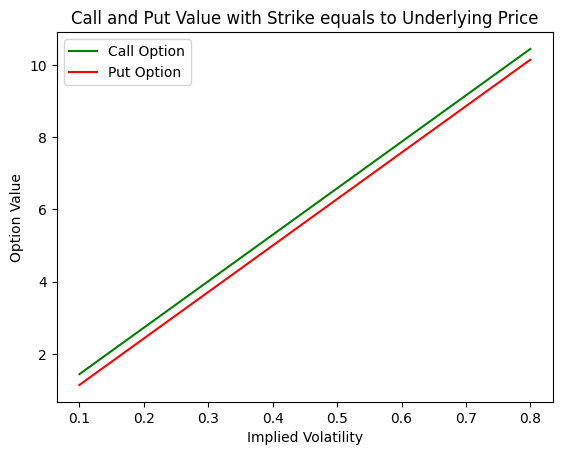

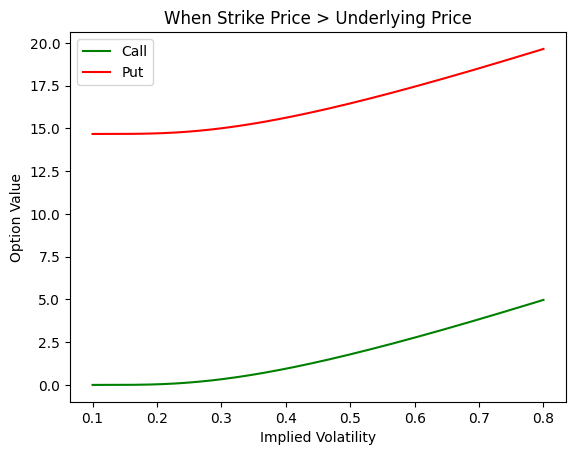

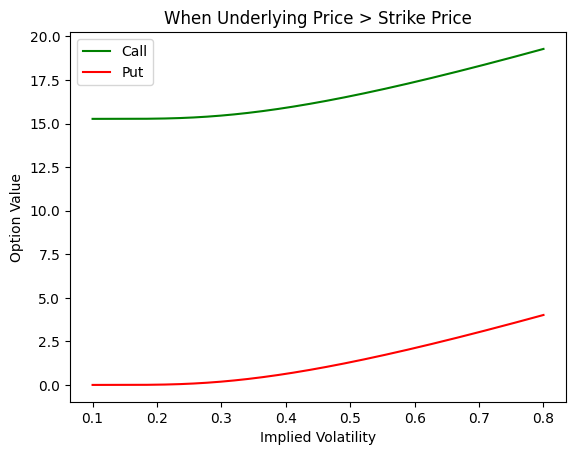

In [ ]:
# calculate the time to maturity
current_day = date(2023,3,3)
expiration_day = date(2023,3,17)
days_to_mat = (expiration_day - current_day).days
# calendar days
ttm = days_to_mat / 365
print("Time to Maturity is {:.4f}".format(ttm))

# define a function to calculate option values with BLack Scholes Formula
def bs_model(underlying, strike, ttm, rf, b, implied_vol, security_type="call"):
    d1 = (log(underlying/strike) + (b+implied_vol**2/2)*ttm)/(implied_vol*sqrt(ttm))
    d2 = d1 - implied_vol*sqrt(ttm)

    if security_type == "call":
        return underlying * exp((b-rf)*ttm) * norm.cdf(d1) - strike*exp(-rf*ttm)*norm.cdf(d2)
    elif security_type == "put":
        return strike*exp(-rf*ttm)*norm.cdf(-d2) - underlying*exp((b-rf)*ttm)*norm.cdf(-d1)
    else:
        print("Invalid type of option")

#initialize the problem
underlying = 165
strike = 165
rf = 0.0525
coupon = 0.0053
b = rf - coupon
implied_vol = np.linspace(0.1, 0.8, 300)

bs_model_call_values = np.zeros(len(implied_vol))
bs_model_put_values = np.zeros(len(implied_vol))

#calculation of option values
for i in range(len(implied_vol)):
    bs_model_call_values[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="call")
    bs_model_put_values[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="put")

#checking put call parity
result = True
for i in range(len(bs_model_call_values)):
    if isclose(bs_model_call_values[i] + strike * exp(-rf*ttm), bs_model_put_values[i] + underlying, abs_tol = 0.1) == False:
        result = False
print(result)

# ploting values of put and call options with impied vols ranging from 0.1 to 0.8
plt.figure()
plt.plot(implied_vol, bs_model_call_values, label="Call Option", color = 'green')
plt.plot(implied_vol, bs_model_put_values, label="Put Option", color = 'red')
plt.xlabel("Implied Volatility")
plt.ylabel("Option Value")
plt.legend()
plt.title("Call and Put Value with Strike equals to Underlying Price")
plt.show()

#Strike > Underlying
strike = 180
bs_model_call_values_diff1 = np.zeros(len(implied_vol))
bs_model_put_values_diff1 = np.zeros(len(implied_vol))

for i in range(len(implied_vol)):
    bs_model_call_values_diff1[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="call")
    bs_model_put_values_diff1[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="put")

# ploting values of put and call options with impied vols ranging from 0.1 to 0.8
plt.figure()
plt.plot(implied_vol, bs_model_call_values_diff1, label="Call", color = 'green')
plt.plot(implied_vol, bs_model_put_values_diff1, label="Put", color = 'red')
plt.xlabel("Implied Volatility")
plt.ylabel("Option Value")
plt.legend()
plt.title("When Strike Price > Underlying Price")
plt.show()

#Underlying > Strike
strike = 150
bs_model_call_values_diff2 = np.zeros(len(implied_vol))
bs_model_put_values_diff2 = np.zeros(len(implied_vol))

for i in range(len(implied_vol)):
    bs_model_call_values_diff2[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="call")
    bs_model_put_values_diff2[i] = bs_model(underlying, strike, ttm, rf, b, implied_vol[i], security_type="put")

# ploting values of put and call options with impied vols ranging from 0.1 to 0.8
plt.figure()
plt.plot(implied_vol, bs_model_call_values_diff2, label="Call", color = 'green')
plt.plot(implied_vol, bs_model_put_values_diff2, label="Put", color = 'red')
plt.xlabel("Implied Volatility")
plt.ylabel("Option Value")
plt.legend()
plt.title("When Underlying Price > Strike Price")
plt.show()

# question2

<ipython-input-9-63b229d0d0af>:26: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  implied_vol[i] = fsolve(f,0.5, xtol=1e-4)[0]


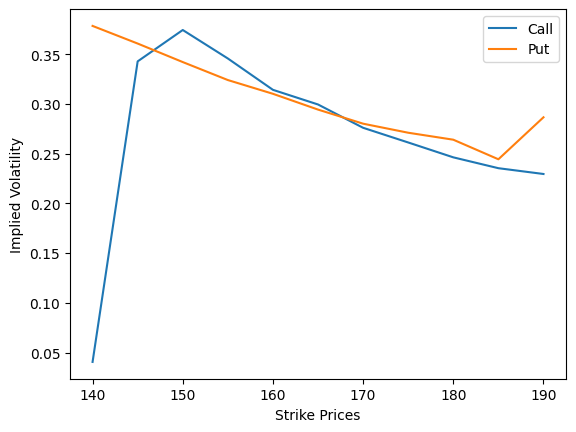

In [ ]:
current_day = date(2023,10,30)
rf = 0.0525
coupon = 0.0057
b = rf - coupon
underlying = 170.15

data = pd.read_csv("AAPL_Options.csv")
expiration = data["Expiration"]
option_type = data["Type"]
strike = data["Strike"]
price = data["Last Price"]
implied_vol = np.zeros(len(data))

#calculate implied volatility
for i in range(len(data)):
    year =  int(expiration[i].split("/")[2])
    month = int(expiration[i].split("/")[0])
    day = int(expiration[i].split("/")[1])
    # define a function so that we could find roots later
    f = lambda ivol: bs_model(underlying, int(strike[i]),
                              (date(int(expiration[i].split("/")[2]), int(expiration[i].split("/")[0]), int(expiration[i].split("/")[1])) - current_day).days/365,
                              rf,
                              b,
                              ivol,
                              security_type=option_type[i].lower()) - float(price[i])
    implied_vol[i] = fsolve(f,0.5, xtol=1e-4)[0]

data["implied_vol"] = implied_vol

# extract call and put data from the combine dataframe
call = data.loc[data["Type"]=="Call"]
put = data.loc[data["Type"]=="Put"]

# plot graphs of implied volatility with respect to strike prices
plt.figure()
#plt.plot(strike, implied_vol, label="All Options")
plt.plot(call.Strike, call.implied_vol, label="Call")
plt.plot(put.Strike, put.implied_vol, label="Put")
plt.xlabel("Strike Prices")
plt.ylabel("Implied Volatility")
plt.legend()
plt.show()

In [ ]:
data["implied_vol"]

,implied_vol
0,0.040555
1,0.342728
2,0.374271
3,0.345630
4,0.314111
5,0.299383
6,0.275944
7,0.261183
8,0.246236
9,0.235327


#question3

<ipython-input-9-761aeb4625df>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ivol[j] = fsolve(f,0.5, xtol=1e-4)[0]


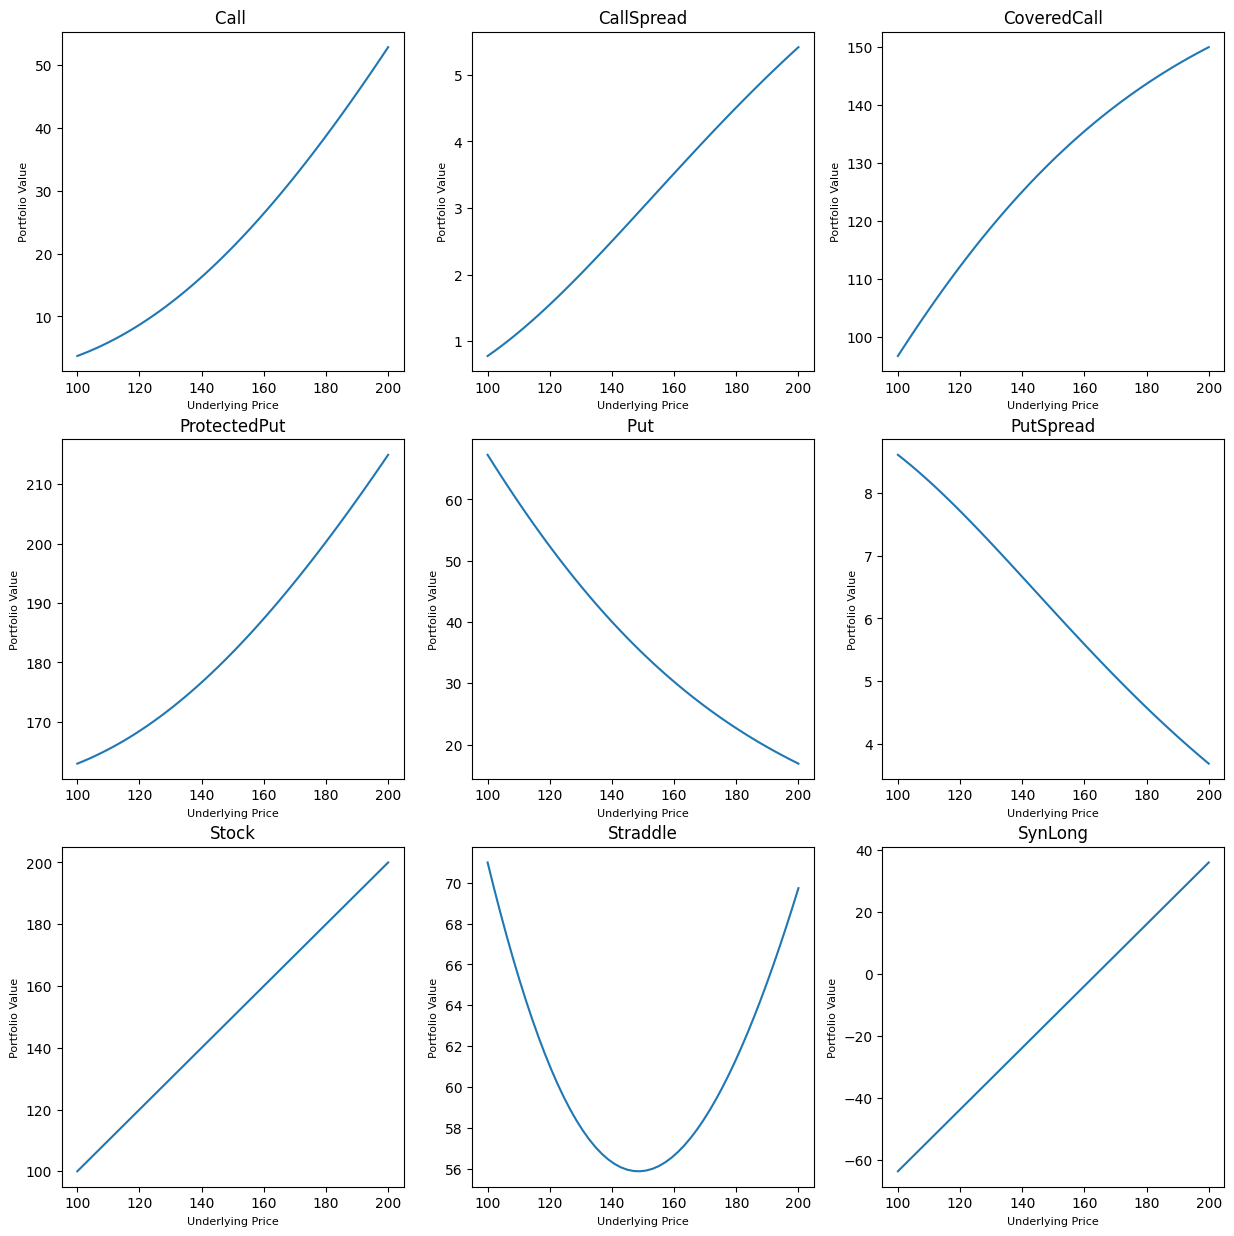

In [ ]:
#part1
# define a function to simulate portfolio values with simulated prices
def sim_portfolio_value(portfolio, sim_p, ivol, rf, b, day_passed=0):
    sim_values = pd.DataFrame(index=portfolio.index, columns=list(range(sim_p.shape[0])))
    for i in portfolio.index:
        if portfolio["Type"][i] == "Stock":
            individual_value = sim_p
        else:
            underlying_p = sim_p
            strike = portfolio["Strike"][i]
            ttm = ((portfolio["ExpirationDate"][i] - datetime(2023,3,3)).days - day_passed) / 365
            individual_value = np.zeros(len(underlying_p))
            for z in range(len(underlying_p)):
                individual_value[z] = bs_model(underlying_p[z], strike, ttm, rf, b, ivol[i], security_type=portfolio["OptionType"][i].lower())

        sim_values.iloc[i,:] = portfolio["Holding"][i] * individual_value

    sim_values['Portfolio'] = portfolio['Portfolio']
    return sim_values.groupby('Portfolio').sum()

# read data
portfolio = pd.read_csv("problem3.csv", parse_dates=["ExpirationDate"])
current_day = date(2023,10,30)
rf = 0.0525
coupon = 0.0057
b = rf - coupon
underlying = 170.15

ivol = np.zeros(len(portfolio.index))
for j in range(len(portfolio.index)):
    if type(portfolio["OptionType"][j]) != str:
        ivol[j] = 0
    else:
        f = lambda ivol: bs_model(underlying, portfolio["Strike"][j], (portfolio["ExpirationDate"][j] - datetime(2023,3,3)).days / 365, rf, b, portfolio["CurrentPrice"][j], security_type=portfolio["OptionType"][j].lower())
        ivol[j] = fsolve(f,0.5, xtol=1e-4)[0]

# apply the defined function
sim_p = np.linspace(100, 200, 50)
simulated_vals = sim_portfolio_value(portfolio, sim_p, ivol, rf, b)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
idx = 0
for portfolios, dataframes in simulated_vals.groupby('Portfolio'):
    i, j = idx // 3, idx % 3
    ax = axes[i][j]
    ax.plot(sim_p, dataframes.iloc[0, :].values)
    ax.set_title(portfolios)
    ax.set_xlabel('Underlying Price', fontsize=8)
    ax.set_ylabel('Portfolio Value', fontsize=8)
    idx += 1


In [ ]:
#part2
# define a function to calculate returns(discrete or log)
def return_calculate(prices: pd.DataFrame, method: str = "DISCRETE", dateColumn: str = "Date"):

    vars = list(prices.columns)
    nVars = len(vars)
    vars.remove(dateColumn)
    if nVars == len(vars):
        raise ValueError("dateColumn: " + dateColumn + " not in DataFrame: " + str(vars))
    nVars = nVars-1

    p = np.array(prices[vars])
    n = p.shape[0]
    m = p.shape[1]
    p2 = np.empty((n-1,m))

    for i in range(n-1):
        for j in range(m):
            p2[i,j] = p[i+1,j] / p[i,j]

    if method.upper() == "DISCRETE":
        p2 = p2 - 1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError("method: " + method + " must be in (\"LOG\",\"DISCRETE\")")

    dates = prices[dateColumn][1:n]
    out = pd.DataFrame({dateColumn: dates})
    for i in range(nVars):
        out[vars[i]] = p2[:,i]
    return out

# read prices data
prices = pd.read_csv("DailyPrices.csv")
lreturns = return_calculate(prices,method="LOG",dateColumn="Date")
aapl_lreturns = lreturns["AAPL"]
aapl_lreturns = aapl_lreturns - aapl_lreturns.mean()

# fit returns with AR(1) model
mod = sm.tsa.ARIMA(aapl_lreturns, order=(1, 0, 0))
results = mod.fit()
summary = results.summary()

#get parameters
m = float(summary.tables[1].data[1][1])
a1 = float(summary.tables[1].data[2][1])
s = sqrt(float(summary.tables[1].data[3][1]))

#simulate returns in next 10 days
sim = pd.DataFrame(0, index=range(10000), columns=["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7", "Day 8", "Day 9", "Day 10"])
for i in range(len(sim.columns)):
    for j in range(len(sim)):
        if i == 0:
            sim.iloc[j,i] =  a1 * (aapl_lreturns.iloc[-1]) + np.random.normal(scale = s) + m
        else:
            sim.iloc[j,i] =  a1 * (sim.iloc[j,i-1]) + np.random.normal(scale = s) + m

# calculate prices in next 10 days from current date
ar1_sim_p = pd.DataFrame(0, index=range(10000), columns=["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7", "Day 8", "Day 9", "Day 10"])
for i in range(len(ar1_sim_p.columns)):
    if i == 0:
        ar1_sim_p.iloc[:,i] = np.exp(sim.iloc[:,i]) * underlying
    else:
        ar1_sim_p.iloc[:,i] = np.exp(sim.iloc[:,i]) * ar1_sim_p.iloc[:,i-1]
ar1_sim_10p = ar1_sim_p.iloc[:,-1]

# calculate portfolio values based on the 10th day's simulated prices from AR(1) model
ar1_sim_10port = sim_portfolio_value(portfolio, ar1_sim_10p, ivol, rf, b, day_passed=10)

portfolio["CurrentValue"] = portfolio["CurrentPrice"] * portfolio["Holding"]
curr_values = portfolio.groupby('Portfolio')['CurrentValue'].sum()
sim_value_changes = (ar1_sim_10port.T - curr_values).T

<ipython-input-10-62a8cf6ebd2e>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]
<ipython-input-10-62a8cf6ebd2e>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]
<ipython-input-10-62a8cf6ebd2e>:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.017920082761254393' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sim.iloc[j,i] =  a1 * (aapl_lreturns.iloc[-1]) 

In [ ]:
#part3

# Using a Historic Simulation
import numpy as np

def cal_VaR_ES_hist(returns, alpha=0.05):
    returns = np.array(returns)

    returns = sorted(returns)
    n = alpha * len(returns)
    iup = int(np.ceil(n)) - 1
    idn = int(np.floor(n)) - 1

    VaR = (returns[iup] + returns[idn]) / 2 if idn >= 0 else returns[0]

    ES = np.mean(returns[0:idn + 1]) if idn >= 0 else returns[0]

    return -VaR, -ES, returns

# calculate mean, VaR, ES for each portfolio
resulting_mat = pd.DataFrame(0, index=ar1_sim_10port.index.values, columns=["Mean of Portfolio Value($)", "Mean of Losses/Gains($)", "VaR($)", "ES($)"])
for i in range(len(resulting_mat)):
    resulting_mat.iloc[i,0] = ar1_sim_10port.iloc[i,:].mean()
    resulting_mat.iloc[i,1] = sim_value_changes.iloc[i,:].mean()
    resulting_mat.iloc[i,2], resulting_mat.iloc[i,3] = cal_VaR_ES_hist(sim_value_changes.iloc[i,:],alpha=0.05)[0:2]

resulting_mat["Current Value (on 2023/10/30)"] = curr_values

<ipython-input-19-06eb95897320>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.257378346206245' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  resulting_mat.iloc[i,0] = ar1_sim_10port.iloc[i,:].mean()
<ipython-input-19-06eb95897320>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.047378346206163' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  resulting_mat.iloc[i,1] = sim_value_changes.iloc[i,:].mean()
<ipython-input-19-06eb95897320>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-16.33661624057185' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  resulting_mat.iloc[i,2], resulting_mat.iloc[i,3] = cal_VaR_

In [ ]:
resulting_mat

,Mean of Portfolio Value($),Mean of Losses/Gains($),VaR($),ES($),Current Value (on 2023/10/30)
Call,32.257378,25.047378,-16.336616,-14.476146,7.21
CallSpread,4.053522,-0.486478,1.235709,1.422406,4.54
CoveredCall,140.348577,-25.171423,31.522624,33.344962,165.52
ProtectedPut,193.763875,19.293875,-10.136935,-8.163772,174.47
Put,25.835316,19.675316,-14.159353,-12.870250,6.16
PutSpread,5.046901,1.876901,-1.099569,-0.896595,3.17
Stock,170.518025,0.368025,14.316127,17.904212,170.15
Straddle,58.092695,44.722695,-41.924931,-41.769508,13.37
SynLong,6.422062,5.372062,9.248708,12.821305,1.05
